#Group3_Data_Operations

In [1]:
# %pip install geoalchemy2

In [2]:
#@title Import relevant modules
import os
import sys
import pandas as pd
import geopandas as gpd
import sqlalchemy as sq
from matplotlib import pyplot as plt
from dotenv import load_dotenv

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_49274/1263603061.py:5: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling

In [3]:
# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
pd.set_option('display.max_columns', None)
os.chdir('/data')
load_dotenv('docker/.env')
PGUSER = os.getenv('POSTGRES_USER')
PGPW = os.getenv('POSTGRES_PW')
PGDB = os.getenv('POSTGRES_DB')

In [4]:
regions = "data/2021CensusAgRegions/lcar000b21a_e.dbf"
gdfRegions = gpd.read_file(regions, encoding='utf-8')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "fiona/ogrext.pyx", line 136, in fiona.ogrext.gdal_open_vector
  File "fiona/_err.pyx", line 291, in fiona._err.exc_wrap_pointer
fiona._err.CPLE_OpenFailedError: 2021CensusAgRegions/lcar000b21a_e.dbf: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_49274/2729776480.py", line 2, in <module>
    gdfRegions = gpd.read_file(regions, encoding='utf-8')
  File "/usr/local/lib/python3.8/dist-packages/geopandas/io/file.py", line 248, in _read_file
    return _read_file_fiona(
  File "/usr/local/lib/python3.8/dist-packages/geopandas/io/file.py", line 289, in _read_file_fiona
    with reader(path_or_bytes, **kwargs) as features:
  File "/usr/local/lib/python3.8/dist-packages/fiona/env.py", line 

In [5]:
stations = "data/climate_station_list.csv"
dfStations = pd.read_csv(stations)

FileNotFoundError: [Errno 2] No such file or directory: 'climate_station_list.csv'

In [ ]:

gdfStationsHly = gpd.GeoDataFrame(dfStations, geometry=gpd.points_from_xy(dfStations.Longitude, dfStations.Latitude))
gdfStationsHly = gdfStationsHly.loc[dfStations['HLY Last Year'] > 1995]

In [ ]:
gdfStationsDly = gpd.GeoDataFrame(dfStations, geometry=gpd.points_from_xy(dfStations.Longitude, dfStations.Latitude))
gdfStationsDly = gdfStationsDly.loc[dfStations['HLY Last Year'] > 1995]

In [ ]:
gdfRegions = gdfRegions.to_crs("EPSG:3347")
gdfStationsHly = gdfStationsHly.set_crs("EPSG:4326", allow_override=True)
gdfStationsHly = gdfStationsHly.to_crs("EPSG:3347")
gdfStationsDly = gdfStationsDly.set_crs("EPSG:4326", allow_override=True)
gdfStationsDly = gdfStationsDly.to_crs("EPSG:3347")

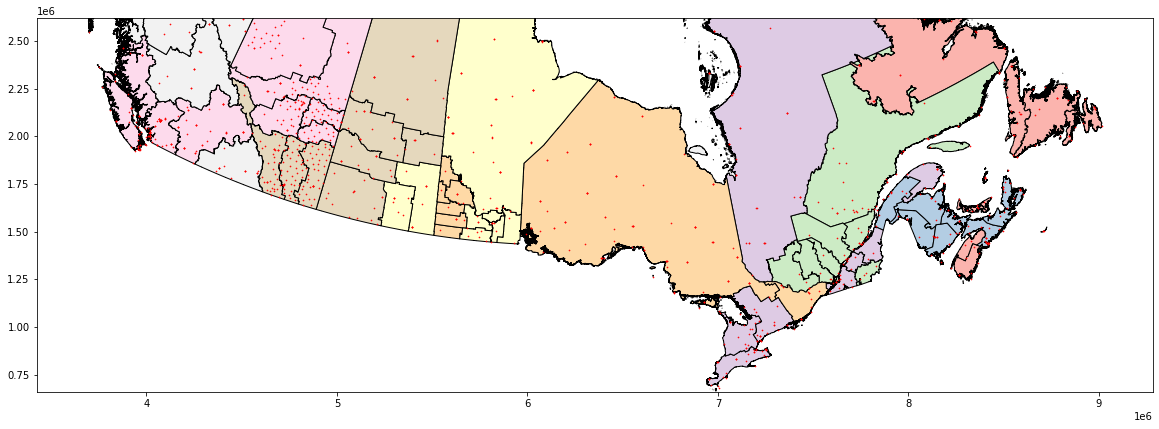

In [ ]:
minx, miny, maxx, maxy = gdfRegions.total_bounds
# plot the both
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_ylim(miny, maxy/2.0)
gdfRegions.plot(ax=ax, cmap='Pastel1', edgecolor='black')
gdfStationsHly.plot(ax=ax, color='red', markersize=0.4)
plt.show()

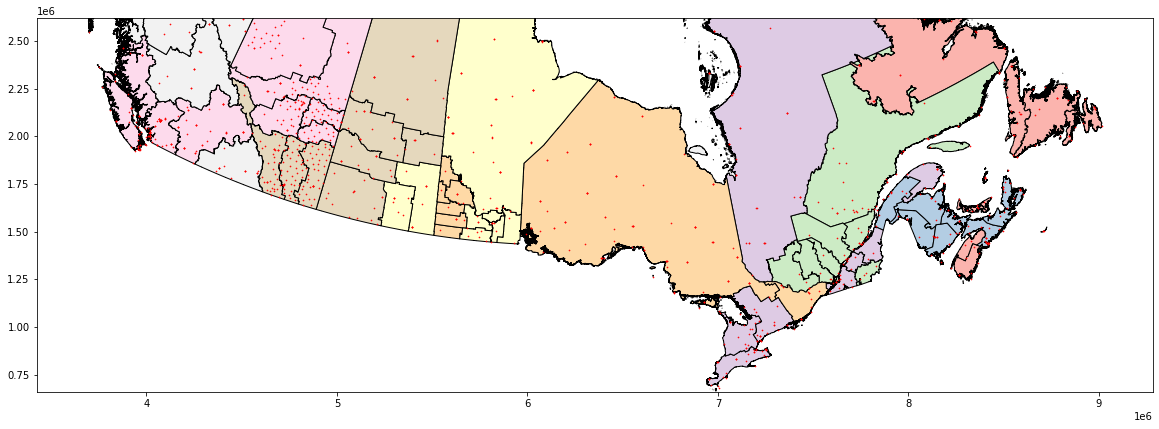

In [ ]:
minx, miny, maxx, maxy = gdfRegions.total_bounds
# plot the both
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_ylim(miny, maxy/2.0)
gdfRegions.plot(ax=ax, cmap='Pastel1', edgecolor='black')
gdfStationsDly.plot(ax=ax, color='red', markersize=0.4)
plt.show()

In [ ]:
# verification
